<a href="https://colab.research.google.com/github/MKR-24/100Days_DL/blob/main/MNIST_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install torch torchvision

In [3]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [4]:
train_data=datasets.MNIST(root="data",train=True,download=True,transform=ToTensor())
test_data=datasets.MNIST(root="data",train=False,download=True,transform=ToTensor())

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.1MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 497kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.49MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.54MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [8]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [9]:
train_data.targets.size()

torch.Size([60000])

In [10]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [11]:
from torch.utils.data import DataLoader
loaders={
    'train':DataLoader(train_data,batch_size=100,shuffle=True,num_workers=1),
    'test':DataLoader(test_data,batch_size=100,shuffle=True,num_workers=1)
}

In [12]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f11a49ac1f0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7f11a49addb0>}

In [14]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()

        self.conv1=nn.Conv2d(in_channels=1,out_channels=10,kernel_size=5)
        self.conv2=nn.Conv2d(in_channels=10,out_channels=20,kernel_size=5)
        self.conv2_drop=nn.Dropout2d()
        self.fc1=nn.Linear(in_features=320,out_features=50)
        self.fc2=nn.Linear(in_features=50,out_features=10)

    def forward(self,x):
        x=F.relu(F.max_pool2d(self.conv1(x),2))
        x=F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
        x=x.view(-1,320)
        x=F.relu(self.fc1(x))
        x=F.dropout(x,training=self.training)
        x=self.fc2(x)

        return F.softmax(x)

In [15]:
import torch

device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

model=CNN().to(device)
optimizer=optim.Adam(model.parameters(),lr=0.001)
error=nn.CrossEntropyLoss()

def train(epoch):
  model.train()
  for batch_idx,(data,target) in enumerate(loaders['train']):
    data,target=data.to(device),target.to(device)
    optimizer.zero_grad()
    output=model(data)
    loss=error(output,target)
    loss.backward()
    optimizer.step()
    if batch_idx%20==0:
      print(f'Train Epoch: {epoch} [{batch_idx*len(data)}/{len(loaders["train"].dataset)} ({100.*batch_idx/len(loaders["train"]):.0f}%)]\tLoss: {loss.item():.6f}')

def test():
  model.eval()
  test_loss=0
  correct=0
  with torch.no_grad():
    for data,target in loaders['test']:
      data,target=data.to(device),target.to(device)
      output=model(data)
      test_loss+=error(output,target).item()
      pred=output.argmax(1,keepdim=True)
      correct+=pred.eq(target.data.view_as(pred)).sum().item()
  test_loss/=len(loaders['test'].dataset)
  print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders["test"].dataset)} ({100.*correct/len(loaders["test"].dataset):.0f}%)\n')

In [16]:
for epoch in range(1,11):
  train(epoch)
  test()

<ipython-input-14-92205ebd77b3>:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.302855
Train Epoch: 1 [2000/60000 (3%)]	Loss: 2.291934
Train Epoch: 1 [4000/60000 (7%)]	Loss: 2.221142
Train Epoch: 1 [6000/60000 (10%)]	Loss: 2.044143
Train Epoch: 1 [8000/60000 (13%)]	Loss: 1.920740
Train Epoch: 1 [10000/60000 (17%)]	Loss: 1.917484
Train Epoch: 1 [12000/60000 (20%)]	Loss: 1.809051
Train Epoch: 1 [14000/60000 (23%)]	Loss: 1.797616
Train Epoch: 1 [16000/60000 (27%)]	Loss: 1.820910
Train Epoch: 1 [18000/60000 (30%)]	Loss: 1.709488
Train Epoch: 1 [20000/60000 (33%)]	Loss: 1.647541
Train Epoch: 1 [22000/60000 (37%)]	Loss: 1.724695
Train Epoch: 1 [24000/60000 (40%)]	Loss: 1.661735
Train Epoch: 1 [26000/60000 (43%)]	Loss: 1.653755
Train Epoch: 1 [28000/60000 (47%)]	Loss: 1.710718
Train Epoch: 1 [30000/60000 (50%)]	Loss: 1.636575
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.613328
Train Epoch: 1 [34000/60000 (57%)]	Loss: 1.724117
Train Epoch: 1 [36000/60000 (60%)]	Loss: 1.604644
Train Epoch: 1 [38000/60000 (63%)]	Loss: 1.653415
Train Epoch

In [17]:
device

device(type='cpu')

<ipython-input-14-92205ebd77b3>:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Prediction: 0


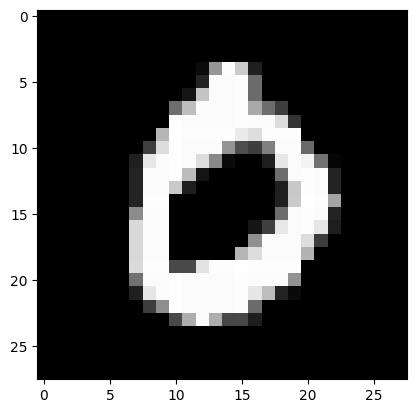

In [20]:
import matplotlib.pyplot as plt

model.eval()
data,target=test_data[3]
data=data.unsqueeze(0).to(device)
output=model(data)
prediction=output.argmax(dim=1,keepdim=True).item()
print(f'Prediction: {prediction}')
image=data.squeeze(0).squeeze(0).cpu().detach().numpy()
plt.imshow(image,cmap='gray')
plt.show()